# HEALTHCARE DATA AGGREGATION

Introduction:
1. Data Integration
2. Data Visulaization

# DATA INTEGRATION

In [1]:
#Import data science package
import pandas as pd

In [2]:
# Load sample healthcare datasets
ra_outbreak = pd.read_csv ('meningitis_dataset.csv')
ra_insurance = pd.read_csv('insurance_data.csv')
ra_cost = pd.read_csv('medical_cost.csv')

In [3]:
#inspect dataset: get the neccesary information on your dataset and make informed decision based on your goal.
ra_outbreak.head(2)

,id,surname,firstname,middlename,gender,gender_male,gender_female,state,settlement,rural_settlement,...,NmA,NmC,NmW,health_status,alive,dead,report_outcome,unconfirmed,confirmed,null_serotype
0,1,Solade,Grace,Solape,Female,0,1,Rivers,Rural,1,...,0,0,0,alive,1,0,confirmed,0,1,1
1,2,Eneche,Kure,Balogun,Male,1,0,Ebonyi,Rural,1,...,0,0,1,Alive,1,0,Confirmed,1,0,1


In [4]:
#ra_outbreak.columns

In [5]:
#dropping a column
ra_outbreak.drop (columns= ['middlename','serotype', 'gender_male','rural_settlement',
       'urban_settlement', 'report_date', 'report_year', 'age_str','cholera',
       'diarrhoea', 'measles', 'viral_haemmorrhaphic_fever', 'meningitis',
       'ebola', 'marburg_virus', 'yellow_fever', 'rubella_mars', 'malaria',
       'serotype', 'NmA', 'NmC', 'NmW','alive', 'dead', 'unconfirmed', 'confirmed', 'null_serotype',
       'gender_female','child_group', 'adult_group'], axis=1, inplace = True)

In [6]:
ra_outbreak.head(2)

,id,surname,firstname,gender,state,settlement,age,date_of_birth,disease,health_status,report_outcome
0,1,Solade,Grace,Female,Rivers,Rural,32,1986-01-17,Cholera,alive,confirmed
1,2,Eneche,Kure,Male,Ebonyi,Rural,32,1985-09-01,Marburg Virus,Alive,Confirmed


In [7]:
ra_outbreak.shape

(284484, 11)

In [8]:
ra_insurance.shape

(1340, 11)

In [9]:
ra_insurance.isnull().sum()

index            0
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [10]:
ra_cost.head(2)

,Id,age,sex,bmi,children,smoker,region,charges
0,1,19,female,27.90,0,yes,southwest,16884.9240
1,2,18,male,33.77,1,no,southeast,1725.5523


In [11]:
ra_cost.shape

(1338, 8)

In [12]:
#dropping a column
ra_insurance.drop (columns= ['index'], axis=1, inplace = True)

In [13]:
#data imputation
import numpy as np
ra_insurance['age'] = ra_insurance['age'].interpolate()

# Display the first few rows of the DataFrame to verify the interpolation
ra_insurance.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39.000000,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24.000000,male,30.1,87,No,0,No,southeast,1131.51
2,3,23.166667,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,22.333333,male,33.7,80,No,0,No,northwest,1136.40
4,5,21.500000,male,34.1,100,No,0,No,northwest,1137.01


In [14]:
ra_insurance['age'] = ra_insurance['age'].astype(int)

# Display the DataFrame to verify the changes
ra_insurance.head(2)

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24,male,30.1,87,No,0,No,southeast,1131.51


In [15]:
# Forward fill missing values in the 'region' column and assign back to the original DataFrame
ra_insurance['region'] = ra_insurance['region'].ffill()

# Display the first few rows of the DataFrame to verify the forward fill
ra_insurance.head()

,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,1,39,male,23.2,91,Yes,0,No,southeast,1121.87
1,2,24,male,30.1,87,No,0,No,southeast,1131.51
2,3,23,male,33.3,82,Yes,0,No,southeast,1135.94
3,4,22,male,33.7,80,No,0,No,northwest,1136.40
4,5,21,male,34.1,100,No,0,No,northwest,1137.01


In [16]:
#rename a column
ra_insurance.rename(columns={"PatientID": "Id"}, inplace=True)

In [17]:
ra_cost.rename(columns={"PatientID": "Id"}, inplace=True)

In [18]:
ra_outbreak.rename(columns={"id": "Id"}, inplace=True)

In [19]:
import pandas as pd
# Merge datasets on common keys (Id)
ra_merged = pd.merge(ra_outbreak, ra_insurance, on='Id')
ra_merged = pd.merge(ra_merged, ra_cost, on='Id')

In [56]:
ra_merged.tail(10)

,Id,surname,firstname,gender,state,settlement,date_of_birth,disease,health_status,report_outcome,...,diabetic,children,smoker,region,claim,age,sex,charges,bmi,age_group
1309,1329,Akinyemi,Alexandria,Female,Bauchi,Urban,1958-06-21,Yellow Fever,alive,Not Confirmed,...,No,1,Yes,southeast,48675.52,52.0,female,22395.74424,42.1,50-69
1310,1330,Ado,Benedicta,Female,Cross River,Rural,2003-10-27,Diarrhoea,dead,Confirmed,...,Yes,0,Yes,southwest,48824.45,32.5,male,10325.20600,37.7,30-49
1311,1331,Akala,Simbi,Female,Nasarawa,Rural,1984-11-02,Viral Haemmorrhaphic Fever,dead,Not Confirmed,...,No,0,Yes,southeast,48885.14,29.5,female,12629.16560,38.1,20-29
1312,1332,Akinyemi,Kagara,Male,Niger,Urban,1990-03-06,Ebola,alive,Not Confirmed,...,No,1,Yes,southeast,48970.25,22.0,female,10795.93733,41.1,20-29
1313,1333,David,Areoye,Male,Oyo,Urban,1987-02-25,Malaria,alive,Confirmed,...,No,2,Yes,southeast,49577.66,28.5,female,11411.68500,37.0,20-29
1314,1334,Eze,Feranmi,Male,Cross River,Urban,2008-02-22,Measles,dead,Not Confirmed,...,No,1,Yes,southwest,51194.56,23.0,male,10600.54830,36.4,20-29
1315,1335,Mohjid,Benedicta,Female,Lagos,Urban,1946-02-21,Cholera,dead,Not Confirmed,...,No,0,Yes,southwest,52590.83,53.5,female,2205.98080,32.8,50-69
1316,1336,Orji,Mooslem,Male,Niger,Rural,2013-05-24,Malaria,alive,Confirmed,...,Yes,0,Yes,northwest,55135.40,23.0,female,1629.83350,35.5,20-29
1317,1337,Ade,Simbi,Female,Sokoto,Urban,1961-09-11,Cholera,dead,Confirmed,...,No,1,Yes,northeast,58571.07,54.5,female,2007.94500,38.1,50-69
1318,1338,Ayo,Florence,Female,Ebonyi,Rural,1973-11-07,Malaria,alive,Not Confirmed,...,Yes,3,Yes,northwest,60021.40,36.0,female,29141.36030,34.5,30-49


# Cleaning and Preprocessing

In [20]:
# Cleanse and preprocess data: standardize formats
ra_merged['date_of_birth'] = pd.to_datetime(ra_merged['date_of_birth'], errors='coerce')

# Combine 'age_x' and 'age_y' columns into a single 'age' column
ra_merged['age'] = ra_merged[['age_x', 'age_y']].mean(axis=1)

# Drop the individual 'age_x' and 'age_y' columns
ra_merged.drop(['age_x', 'age_y'], axis=1, inplace=True)

In [21]:
# Fill missing values in 'gender_x' column with values from 'gender_y' column
ra_merged['gender_x'].fillna(ra_merged['gender_y'], inplace=True)

# Rename 'gender_x' to 'gender'
ra_merged.rename(columns={'gender_x': 'gender'}, inplace=True)

# Drop 'gender_y' column
ra_merged.drop('gender_y', axis=1, inplace=True)

In [22]:
# Fill missing values in 'children_x' column with values from 'children_y' column
ra_merged['children_x'].fillna(ra_merged['children_y'], inplace=True)

# Rename 'children_x' to 'children'
ra_merged.rename(columns={'children_x': 'children'}, inplace=True)

# Drop 'children_y' column
ra_merged.drop('children_y', axis=1, inplace=True)

In [23]:
# Fill missing values in 'smoker_x' column with values from 'smoker_y' column
ra_merged['smoker_x'].fillna(ra_merged['smoker_y'], inplace=True)

# Rename 'smoker_x' to 'smoker'
ra_merged.rename(columns={'smoker_x': 'smoker'}, inplace=True)

# Drop 'smoker_y' column
ra_merged.drop('smoker_y', axis=1, inplace=True)

In [24]:
# Fill missing values in 'region_x' column with values from 'region_y' column
ra_merged['region_x'].fillna(ra_merged['region_y'], inplace=True)

# Rename 'region_x' to 'region'
ra_merged.rename(columns={'region_x': 'region'}, inplace=True)

# Drop 'region_y' column
ra_merged.drop('region_y', axis=1, inplace=True)

In [25]:
# Combine 'bmi_x' and 'bmi_y' columns into a single 'bmi' column
ra_merged['bmi'] = ra_merged['bmi_x'].combine_first(ra_merged['bmi_y'])

# Drop 'bmi_x' and 'bmi_y' columns
ra_merged.drop(['bmi_x', 'bmi_y'], axis=1, inplace=True)

In [26]:
ra_merged.columns

Index(['Id', 'surname', 'firstname', 'gender', 'state', 'settlement',
       'date_of_birth', 'disease', 'health_status', 'report_outcome',
       'bloodpressure', 'diabetic', 'children', 'smoker', 'region', 'claim',
       'age', 'sex', 'charges', 'bmi'],
      dtype='object')

# DATA AGGREGATION

In [27]:
# Calculate average age of meningitis patients
average_age = ra_merged.groupby('gender')['age'].mean()
print("Average Age by Gender:")
print(average_age)

# Analyze insurance coverage among meningitis patients
insurance_distribution = ra_merged['claim'].value_counts(normalize=True)
print("\nInsurance Coverage Distribution:")
print(insurance_distribution)

# Calculate total medical costs associated with treating meningitis
total_medical_costs = ra_merged['charges'].sum()
print("\nTotal Medical Costs for Meningitis Treatment:")
print(total_medical_costs)

Average Age by Gender:
gender
Female    36.049048
Male      36.772013
Name: age, dtype: float64

Insurance Coverage Distribution:
claim
1639.56     0.001516
1704.57     0.001516
1149.40     0.001516
1121.87     0.000758
12829.46    0.000758
              ...   
6313.76     0.000758
6311.95     0.000758
6289.75     0.000758
6282.24     0.000758
60021.40    0.000758
Name: proportion, Length: 1316, dtype: float64

Total Medical Costs for Meningitis Treatment:
17498829.140809


In [28]:
# Calculate distribution of patients by custom age group
age_bins = [9, 20, 30, 46, 67]  # Adjusted age bins to cover the entire range
age_labels = ['10-19', '20-29', '30-49', '50-69']  # Labels for age groups
ra_merged['age_group'] = pd.cut(ra_merged['age'], bins=age_bins, labels=age_labels, right=False)
age_distribution = ra_merged['age_group'].value_counts().sort_index()
print("Distribution of Patients by Age Group:")
print(age_distribution)

Distribution of Patients by Age Group:
age_group
10-19    133
20-29    290
30-49    567
50-69    329
Name: count, dtype: int64


In [29]:
# Calculate average age of patients by disease
average_age_by_disease = ra_merged.groupby('disease')['age'].mean()
print("\nAverage Age of Patients by Disease:")
print(average_age_by_disease)


Average Age of Patients by Disease:
disease
Cholera                       35.718750
Diarrhoea                     36.127737
Ebola                         36.273913
Malaria                       35.330935
Marburg Virus                 36.617284
Measles                       36.917323
Meningitis                    37.463115
Rubella Mars                  35.841463
Viral Haemmorrhaphic Fever    37.076923
Yellow Fever                  36.779167
Name: age, dtype: float64


In [30]:
# Determine distribution of patients by state
state_distribution = ra_merged['state'].value_counts()
print("Distribution of Patients by State:")
print(state_distribution)

Distribution of Patients by State:
state
Nasarawa                     53
Ebonyi                       45
Yobe                         44
Osun                         41
Imo                          40
Rivers                       39
Kaduna                       39
Adamawa                      39
Katsina                      38
Abia                         38
Bauchi                       37
Edo                          37
Sokoto                       37
Kogi                         37
Ekiti                        36
Akwa Ibom                    36
Ogun                         36
Niger                        36
Delta                        35
Cross River                  35
Kwara                        35
Oyo                          35
Zamfara                      35
Jigawa                       34
Kebbi                        34
Gombe                        34
Bayelsa                      34
Borno                        34
Plateau                      33
Ondo                         33

In [31]:
# Analyze healthcare costs by region
healthcare_cost_by_region = ra_merged.groupby('region')['charges'].mean()
print("\nAverage Healthcare Costs by Region:")
print(healthcare_cost_by_region)


Average Healthcare Costs by Region:
region
northeast    14157.035302
northwest    13668.451793
southeast    12549.032938
southwest    13164.640157
Name: charges, dtype: float64


In [32]:
# Analyze disease count by region
disease_by_region = ra_merged.groupby('region')['disease'].value_counts()

print("\nDisease Count by Region:")
print(disease_by_region)


Disease Count by Region:
region     disease                   
northeast  Diarrhoea                     29
           Yellow Fever                  29
           Measles                       28
           Malaria                       27
           Cholera                       23
           Marburg Virus                 23
           Meningitis                    20
           Rubella Mars                  19
           Ebola                         18
           Viral Haemmorrhaphic Fever    14
northwest  Diarrhoea                     40
           Viral Haemmorrhaphic Fever    40
           Marburg Virus                 40
           Rubella Mars                  36
           Meningitis                    35
           Measles                       34
           Yellow Fever                  31
           Malaria                       31
           Ebola                         31
           Cholera                       29
southeast  Marburg Virus                 60
           C

In [33]:
# Calculate prevalence of diseases among patients
disease_prevalence = ra_merged['disease'].value_counts(normalize=True)
print("Prevalence of Diseases Among Patients:")
print(disease_prevalence)

Prevalence of Diseases Among Patients:
disease
Marburg Virus                 0.122820
Cholera                       0.109174
Malaria                       0.105383
Diarrhoea                     0.103867
Viral Haemmorrhaphic Fever    0.098560
Measles                       0.096285
Rubella Mars                  0.093252
Meningitis                    0.092494
Yellow Fever                  0.090978
Ebola                         0.087187
Name: proportion, dtype: float64


In [34]:
# Calculate disease count per gender
disease_count_per_gender = ra_merged.groupby('gender')['disease'].count()

# Display the result
print("Disease Count per Gender:")
print(disease_count_per_gender)

Disease Count per Gender:
gender
Female    683
Male      636
Name: disease, dtype: int64


In [35]:
# Convert health_status to lowercase
ra_merged['health_status'] = ra_merged['health_status'].str.lower()

# Distribution of health status by settlement
health_status_distribution = ra_merged.groupby('settlement')['health_status'].value_counts()

print("\nDistribution of Health Status by Settlement:")
print(health_status_distribution)


Distribution of Health Status by Settlement:
settlement  health_status
Rural       dead             339
            alive            315
Urban       dead             342
            alive            323
Name: count, dtype: int64


In [36]:
ra_merged.columns

Index(['Id', 'surname', 'firstname', 'gender', 'state', 'settlement',
       'date_of_birth', 'disease', 'health_status', 'report_outcome',
       'bloodpressure', 'diabetic', 'children', 'smoker', 'region', 'claim',
       'age', 'sex', 'charges', 'bmi', 'age_group'],
      dtype='object')

# Data Visualization and Reporting 

<Figure size 1000x600 with 0 Axes>

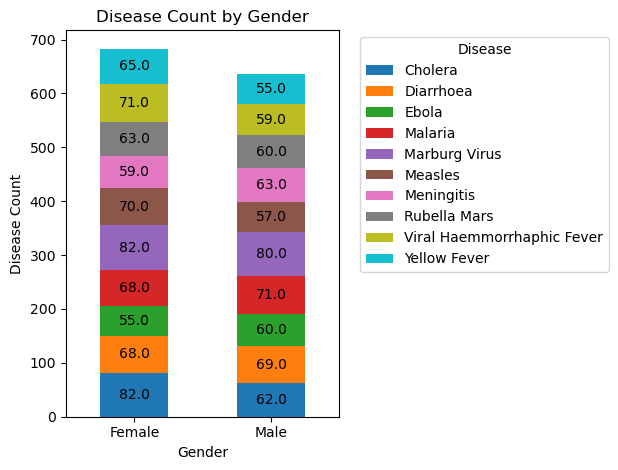

In [37]:
import matplotlib.pyplot as plt

# Group the data by gender and disease, then count the occurrences
disease_count_by_gender = ra_merged.groupby(['gender', 'disease']).size().unstack(fill_value=0)

# Visualization: Stacked bar plot of disease count by gender
plt.figure(figsize=(10, 6))
ax = disease_count_by_gender.plot(kind='bar', stacked=True)

# Adding data labels to each stacked bar
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center')

# Adding labels and title
plt.title('Disease Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Disease Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Shifting the legend to the far right of the chart
plt.legend(title='Disease', bbox_to_anchor=(1.05, 1), loc='upper left')

# Showing the plot
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [38]:
#ra_merged['disease'].unique()

In [39]:
ra_merged.columns

Index(['Id', 'surname', 'firstname', 'gender', 'state', 'settlement',
       'date_of_birth', 'disease', 'health_status', 'report_outcome',
       'bloodpressure', 'diabetic', 'children', 'smoker', 'region', 'claim',
       'age', 'sex', 'charges', 'bmi', 'age_group'],
      dtype='object')

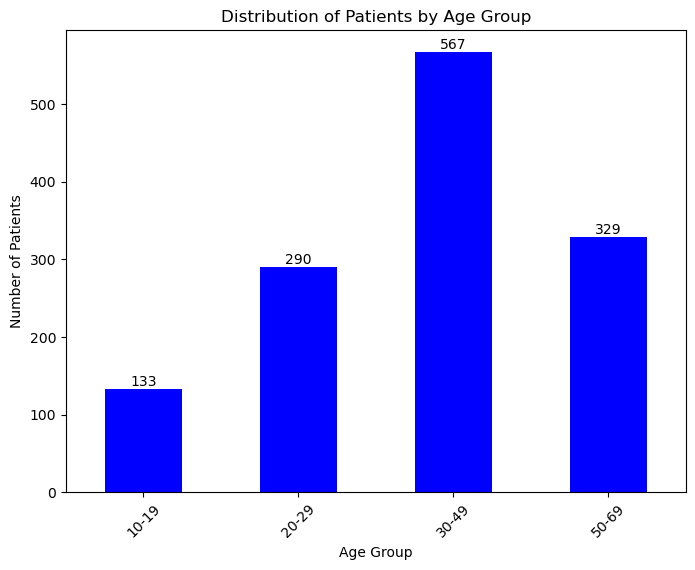

In [40]:
# Visualization: Bar chart of patients by age group with data labels
plt.figure(figsize=(8, 6))
bars = age_distribution.plot(kind='bar', color='blue')

# Add data labels to the bars
for bar in bars.patches:
    plt.annotate(round(bar.get_height(), 2), 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='bottom')
    
plt.title('Distribution of Patients by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.xticks(rotation=45)
plt.show()

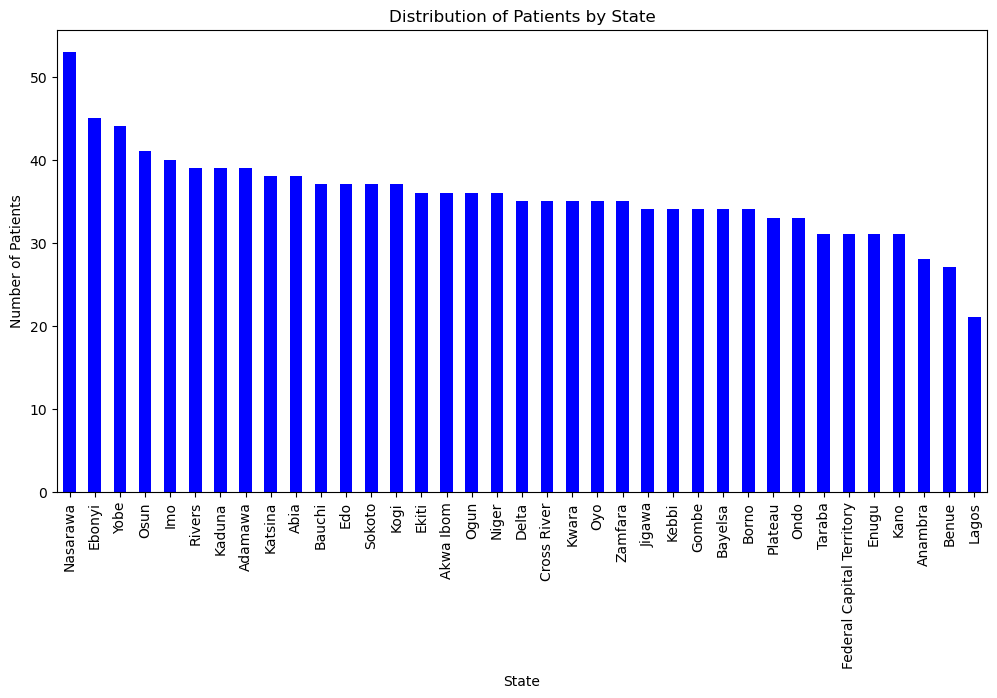

In [41]:
# Visualization: Bar chart of patients by state
plt.figure(figsize=(12, 6))
state_distribution.plot(kind='bar', color='blue')
plt.title('Distribution of Patients by State')
plt.xlabel('State')
plt.ylabel('Number of Patients')
plt.xticks(rotation=90)
plt.show()

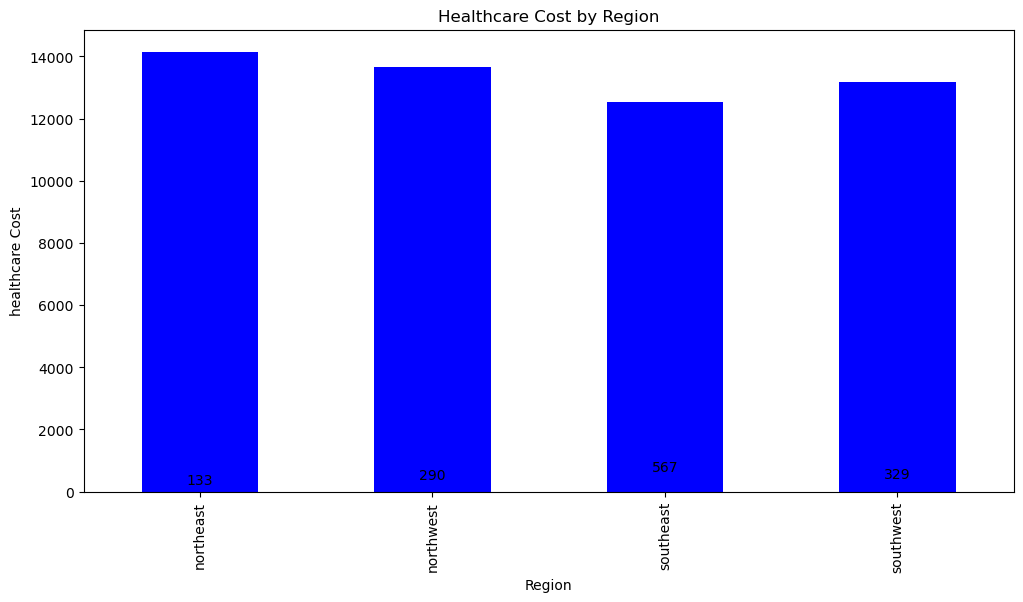

In [42]:
# Visualization: Bar chart of patients by state
plt.figure(figsize=(12, 6))
healthcare_cost_by_region.plot(kind='bar', color='blue')

# Add data labels to the bars
for bar in bars.patches:
    plt.annotate(round(bar.get_height(), 2), 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='bottom')
    
plt.title('Healthcare Cost by Region')
plt.xlabel('Region')
plt.ylabel('healthcare Cost')
plt.xticks(rotation=90)
plt.show()

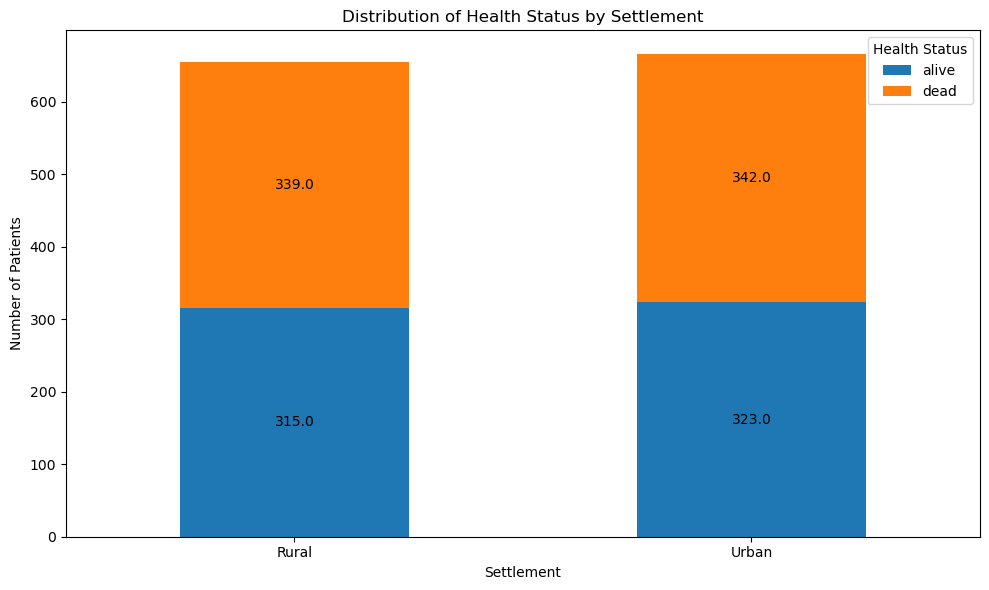

In [43]:
import matplotlib.pyplot as plt

# Unstack the grouped data to prepare for plotting
health_status_distribution_unstacked = health_status_distribution.unstack()

# Plotting the stacked bar chart
ax = health_status_distribution_unstacked.plot(kind='bar', stacked=True, figsize=(10, 6))

# Adding data labels to the stacked bars
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}', (x + width/2, y + height/2), ha='center', va='center')

# Adding labels and title
plt.title('Distribution of Health Status by Settlement')
plt.xlabel('Settlement')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Showing the plot
plt.legend(title='Health Status')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

<Figure size 1200x800 with 0 Axes>

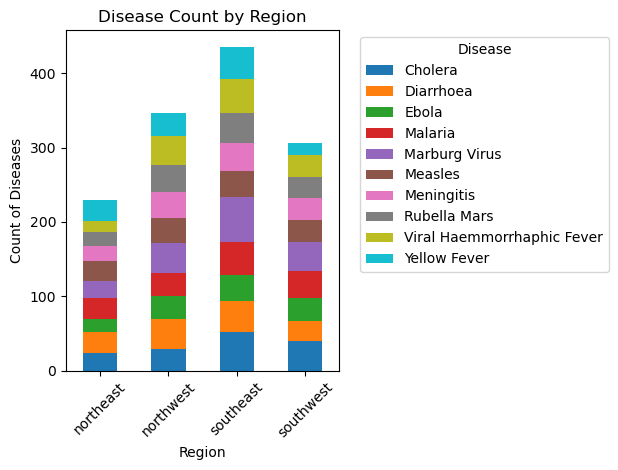

In [44]:
import matplotlib.pyplot as plt

# Analyze disease count by region
disease_by_region = ra_merged.groupby(['region', 'disease']).size().unstack(fill_value=0)

# Visualization: Stacked bar plot of disease count by region
plt.figure(figsize=(12, 8))
disease_by_region.plot(kind='bar', stacked=True)

# Adding labels and title
plt.title('Disease Count by Region')
plt.xlabel('Region')
plt.ylabel('Count of Diseases')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed

# Showing the plot
plt.legend(title='Disease', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

# USE CASE EXAMPLE

In [45]:
ra_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Id              1319 non-null   int64         
 1   surname         1319 non-null   object        
 2   firstname       1319 non-null   object        
 3   gender          1319 non-null   object        
 4   state           1319 non-null   object        
 5   settlement      1319 non-null   object        
 6   date_of_birth   1300 non-null   datetime64[ns]
 7   disease         1319 non-null   object        
 8   health_status   1319 non-null   object        
 9   report_outcome  1319 non-null   object        
 10  bloodpressure   1319 non-null   int64         
 11  diabetic        1319 non-null   object        
 12  children        1319 non-null   int64         
 13  smoker          1319 non-null   object        
 14  region          1319 non-null   object        
 15  clai

In [46]:
# Disease Distribution
# Calculate the distribution of diseases
disease_distribution = ra_merged['disease'].value_counts()
disease_distribution

disease
Marburg Virus                 162
Cholera                       144
Malaria                       139
Diarrhoea                     137
Viral Haemmorrhaphic Fever    130
Measles                       127
Rubella Mars                  123
Meningitis                    122
Yellow Fever                  120
Ebola                         115
Name: count, dtype: int64

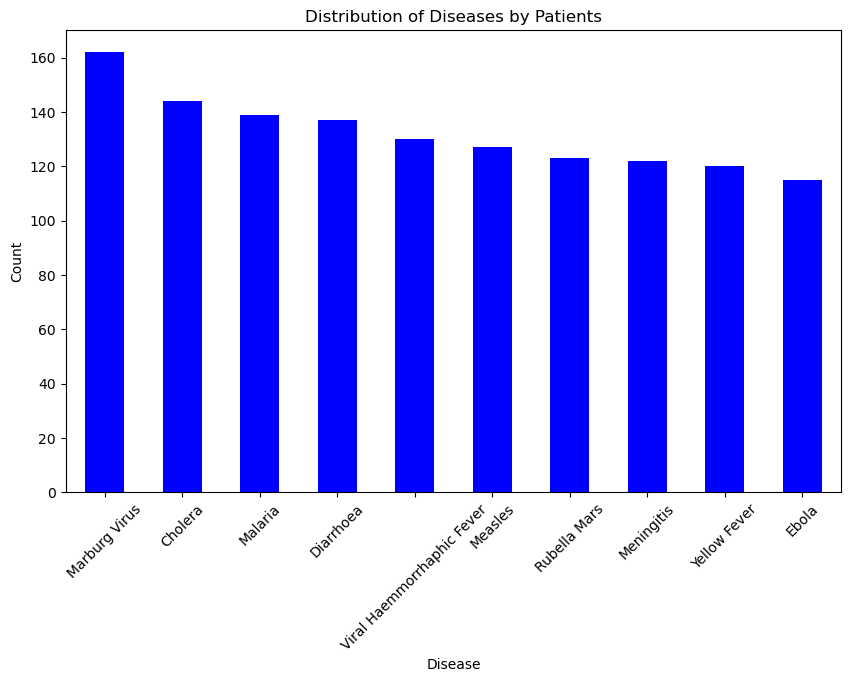

In [53]:
# Visualize the distribution of diseases
plt.figure(figsize=(10, 6))
disease_distribution.plot(kind='bar', color='blue')
plt.title('Distribution of Diseases by Patients')
plt.xlabel('Disease')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [48]:
# Health Outcomes Analysis
# Calculate mortality rates and survival rates for each disease
health_outcomes = ra_merged.groupby('disease')['health_status'].value_counts(normalize=True).unstack(fill_value=0)

In [49]:
# Visualize health outcomes
print("\nHealth Outcomes Analysis:")
print(health_outcomes)


Health Outcomes Analysis:
health_status                  alive      dead
disease                                       
Cholera                     0.472222  0.527778
Diarrhoea                   0.445255  0.554745
Ebola                       0.469565  0.530435
Malaria                     0.532374  0.467626
Marburg Virus               0.506173  0.493827
Measles                     0.480315  0.519685
Meningitis                  0.483607  0.516393
Rubella Mars                0.463415  0.536585
Viral Haemmorrhaphic Fever  0.453846  0.546154
Yellow Fever                0.525000  0.475000


In [50]:
# Age Group Analysis
# Analyze the distribution of diseases, mortality rates, and healthcare costs across different age groups
age_group_analysis = ra_merged.groupby('age_group').agg({
    'disease': 'count',
    'health_status': lambda x: (x == 'Dead').mean(),  # Calculate mortality rate
    'charges': 'mean'
})

In [51]:
# Visualize age group analysis
print("\nAge Group Analysis:")
print(age_group_analysis)


Age Group Analysis:
           disease  health_status       charges
age_group                                      
10-19          133            0.0  13208.031830
20-29          290            0.0  12556.578678
30-49          567            0.0  12776.425738
50-69          329            0.0  14761.458046


Insights and Recommendations

Data Paucity Resolved.